## Observations
1. Temperature increases as the latitude is closer to 0
2. Cities in the northern hemisphere have colder temperatures as compared to cities in the southern hemisphere during the winter
3. Latitude does not have a direct correlation to cloudiness or windspeed
4. There is a data error in the data provided by the openweather map api which lists a 300% humidity for one city
5. Cloudiness results band together - implying that data is somewhat subjective and subject to rounding 

In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
import csv


#import Open Weather Map api key
from api_key import key

base_url = 'http://api.openweathermap.org/data/2.5/weather?APPID=' + key
units = 'imperial'


In [10]:
#save empty lists
lats = []
longs = []
lats_longs = []
cities = []

#generate random lists of lats and longs within a range, and return more than 500 cities
longs = np.random.uniform(low=-180, high=180, size=1200)
lats = np.random.uniform(low=-90, high=90, size=1200)

#zip the lats and longs from above together
lats_longs = zip(lats, longs)

#loop through the lats and longs and return a the closes city from citipy, if that city has not already been returned
#add it to the list of cities
for coords in lats_longs:
    city = citipy.nearest_city(coords[0], coords[1]).city_name
    
    if city not in cities:
        cities.append(city)
#print how many unique cities were returned to ensure >500        
print(len(cities))

511


In [3]:
weather_df = pd.DataFrame()

#loop through the cities to call the openweathermap api for each city
for city in cities:
    response = requests.get(base_url + '&q=' + city + '&units=' + units)
    
#if the city is not in openweathermap's directory, skip it
    if response.status_code != 200:
  
        print('City not found, skip')
        pass
#if the city is in openweathermaps directory, save all of the data into a dataframe and print out the city name                
    else:
        city_weather = response.json()
        city_name = city_weather['name']
        print(f'Retrieving weather data for: {city_name}')
        lat = city_weather['coord']['lat']
        long = city_weather['coord']['lon']
        temp = city_weather['main']['temp']
        humidity = city_weather['main']['humidity']
        clouds = city_weather['clouds']['all']
        wind = city_weather['wind']['speed']
        weather_df = weather_df.append({'City Name': city_name,
                           'Latitude': lat,
                           'Longitude': long,
                           'Temp (F)': temp,
                           'Humidity (%)': humidity,
                           'Clouds (%)': clouds,
                           'Wind (mph)': wind}, ignore_index=True)
                

Retrieving weather data for: Hambantota
City not found, skip
Retrieving weather data for: Hermanus
Retrieving weather data for: Georgetown
Retrieving weather data for: Vaini
City not found, skip
Retrieving weather data for: Paris
Retrieving weather data for: Chuy
Retrieving weather data for: Hamilton
Retrieving weather data for: Mitu
Retrieving weather data for: Zyryanka
Retrieving weather data for: Itaituba
Retrieving weather data for: Ponce
Retrieving weather data for: Laguna
Retrieving weather data for: Rikitea
Retrieving weather data for: Busselton
Retrieving weather data for: Oban
Retrieving weather data for: Thompson
Retrieving weather data for: Mar del Plata
Retrieving weather data for: Ust-Tsilma
Retrieving weather data for: Tuktoyaktuk
Retrieving weather data for: Malyye Derbety
Retrieving weather data for: Jamestown
Retrieving weather data for: Hongjiang
Retrieving weather data for: Bethel
Retrieving weather data for: Port Alfred
Retrieving weather data for: Ushuaia
Retrievin

Retrieving weather data for: Rio Gallegos
Retrieving weather data for: Guerrero Negro
Retrieving weather data for: Longyearbyen
Retrieving weather data for: Malanje
Retrieving weather data for: Neon Karlovasion
Retrieving weather data for: Siukh
Retrieving weather data for: Challapata
Retrieving weather data for: Port Lincoln
Retrieving weather data for: Evans
Retrieving weather data for: Bubaque
Retrieving weather data for: Kununurra
Retrieving weather data for: Zhezkazgan
Retrieving weather data for: Mao
Retrieving weather data for: Boa Vista
Retrieving weather data for: Tamale
City not found, skip
Retrieving weather data for: Parana
Retrieving weather data for: Tanda
Retrieving weather data for: Shache
Retrieving weather data for: Manta
Retrieving weather data for: Provideniya
Retrieving weather data for: Narsaq
Retrieving weather data for: Bokovskaya
Retrieving weather data for: Lincoln
Retrieving weather data for: Khandyga
Retrieving weather data for: Lata
City not found, skip
Ret

Retrieving weather data for: Tagab
Retrieving weather data for: Cayenne
Retrieving weather data for: Tarakan
Retrieving weather data for: Inhambane
Retrieving weather data for: Srednekolymsk
Retrieving weather data for: Victor Harbor
Retrieving weather data for: Leningradskiy
Retrieving weather data for: Kenai
Retrieving weather data for: Havre-Saint-Pierre
Retrieving weather data for: Talara
Retrieving weather data for: Jackville
Retrieving weather data for: Nanga Eboko
City not found, skip
Retrieving weather data for: Itoman
Retrieving weather data for: Los Llanos de Aridane
Retrieving weather data for: Avera
Retrieving weather data for: Bhadra
City not found, skip
Retrieving weather data for: Hays
Retrieving weather data for: Rayevskiy
Retrieving weather data for: Walvis Bay
Retrieving weather data for: Whitefish
Retrieving weather data for: Fairbanks
City not found, skip
Retrieving weather data for: Sfantu Gheorghe
Retrieving weather data for: Vila
Retrieving weather data for: Cara

## Weather dataframe

In [4]:
#show the dataframe
weather_df.head()

,City Name,Clouds (%),Humidity (%),Latitude,Longitude,Temp (F),Wind (mph)
0,Hambantota,0.0,100.0,6.12,81.12,77.64,14.43
1,Hermanus,0.0,48.0,-34.42,19.24,73.59,6.04
2,Georgetown,40.0,79.0,6.80,-58.16,85.15,16.11
3,Vaini,0.0,70.0,15.34,74.49,62.75,4.14
4,Paris,90.0,75.0,48.86,2.35,41.45,3.36


In [5]:
#save the dataframe to a csv
weather_df.to_csv('weather_data.csv', index=False, header=True)

## Latitude vs. Temperature Graph

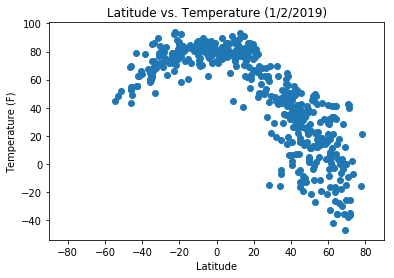

In [6]:
#plot the graph showing the relationship between latitude and current temperature
plt.scatter(weather_df['Latitude'], weather_df['Temp (F)'])
plt.xlim(-90, 90)
plt.title('Latitude vs. Temperature (1/2/2019)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

#save to png and show
plt.savefig('latvtemp.png')
plt.show()

## Latitude vs. Humidity Graph

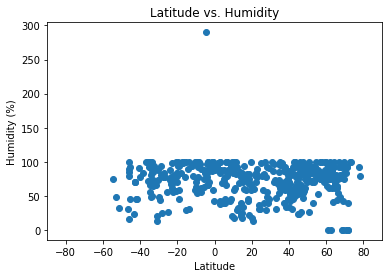

In [7]:
#plot the graph showing the relationship between latitude and current humidity
plt.scatter(weather_df['Latitude'], weather_df['Humidity (%)'])
plt.xlim(-90, 90)
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#save to png and show
plt.savefig('latvhumidity.png')
plt.show()

## Latitude vs Cloudiness Graph

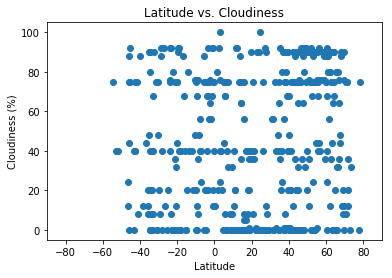

In [8]:
#plot the graph showing the relationship between latitude and current cloudiness
plt.scatter(weather_df['Latitude'], weather_df['Clouds (%)'])
plt.xlim(-90, 90)
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#save to png and show
plt.savefig('latvclouds.png')
plt.show()

## Latitude vs. Wind Speed Graph

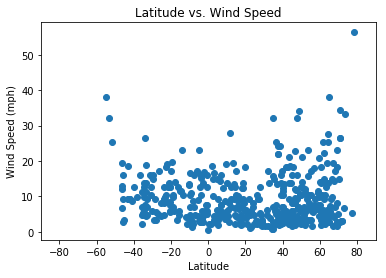

In [9]:
#plot the graph showing the relationship between latitude and current windspeed
plt.scatter(weather_df['Latitude'], weather_df['Wind (mph)'])
plt.xlim(-90, 90)
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#save to png and show
plt.savefig('latvwind.png')
plt.show()